# Data preparation

In [1]:
import pandas as pd

In [2]:
data_file = "D:\studia\PRO\inzynierka\dane.data"
data = pd.read_csv(data_file, sep='\t', header=0, low_memory=False)
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [3]:
phrases = data.iloc[0:, -2]
phrases.head()

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
Name: Phrase, dtype: object

In [4]:
labels = data.iloc[0:, -1]
labels.head()

0    1
1    2
2    2
3    2
4    2
Name: Sentiment, dtype: int64

##  Vectorization

### Stopwords

In [7]:
from nltk.corpus import stopwords
from string import punctuation
english_stopwords = set(stopwords.words('english') + list(punctuation) + ['“', '”', '’'])

### Term Frequency-Inverse Document Frequency

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=english_stopwords)

In [9]:
vectorized_phrases_tfid = tfidf_vectorizer.fit_transform(phrases)

### Simple count

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer(stop_words=english_stopwords) 
vectorized_phrases_count = count_vectorize.fit_transform(phrases)

## Train-test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_data_tfidf, test_data_tfidf, train_label, test_label = train_test_split(vectorized_phrases_tfid, labels, test_size=0.2, random_state=1)

In [84]:
train_data_count, test_data_count, train_label, test_label = train_test_split(vectorized_phrases_count, labels, test_size=0.2, random_state=1)

# Useful functions

In [96]:
from sklearn import metrics
from seaborn import heatmap
import matplotlib.pyplot as plt


def plot_heatmap(matrix, accuracy, labels, title):
    heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Accuracy: {:0.2f}%".format(accuracy * 100))
    plt.suptitle(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    
def plot(predictions, title):
    label_set = set(test_label)
    matrix = metrics.confusion_matrix(test_label, predictions, labels=list(label_set))
    accuracy = metrics.accuracy_score(test_label, predictions)
    plot_heatmap(matrix, accuracy, label_set, title)

# Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier_tfidf = MultinomialNB()
classifier_count = MultinomialNB()

In [88]:
classifier_tfidf.fit(train_data_tfidf,train_label)

MultinomialNB()

In [89]:
classifier_count.fit(train_data_count,train_label)

MultinomialNB()

In [90]:
predictions_nb_tfidf = classifier_tfidf.predict(test_data_tfidf)

In [91]:
predictions_nb_count = classifier_tfidf.predict(test_data_count)

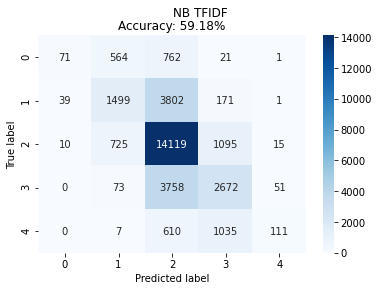

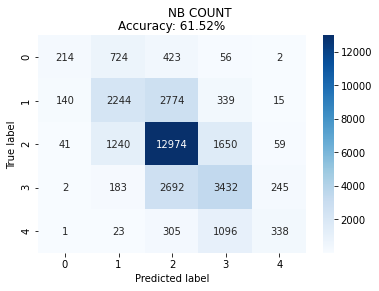

In [98]:
plot(predictions_nb_tfidf, "NB TFIDF")
plot(predictions_nb_count, "NB COUNT")

# Support Vector Machine

In [102]:
from sklearn.svm import LinearSVC
svc_classifier_tfidf = LinearSVC(max_iter=5000)
svc_classifier_count = LinearSVC(max_iter=5000)

In [103]:
svc_classifier_tfidf.fit(train_data_tfidf, train_label)

LinearSVC(max_iter=5000)

In [104]:
svc_classifier_count.fit(train_data_count, train_label)

LinearSVC(max_iter=5000)

In [105]:
predictions_svc_tfidf  = svc_classifier_tfidf.predict(test_data_tfidf)

In [106]:
predictions_svc_count  = svc_classifier_tfidf.predict(test_data_count)

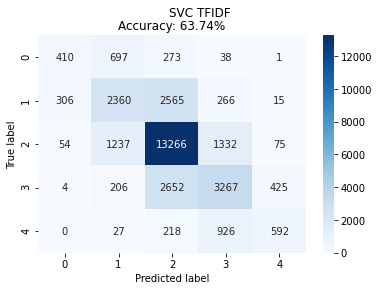

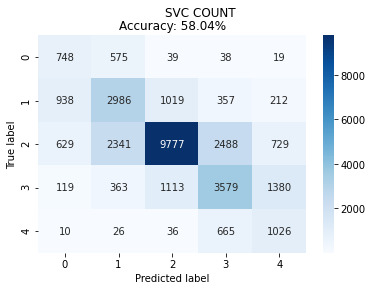

In [108]:
plot(predictions_svc_tfidf, "SVC TFIDF")
plot(predictions_svc_count, "SVC COUNT")


# Results

In [143]:
results = pd.DataFrame(phrases.iloc[test_label.index])

In [144]:
results['Sentiment'] = test_label
results['NB TFIDF'] = predictions_nb_tfidf
results['SVM TFIDF'] = predictions_svc_tfidf
results['NB COUNT'] = predictions_nb_count
results['SVM COUNT'] = predictions_svc_count

In [145]:
results

Phrase  Sentiment  \
78734                                             Bad and          1   
126189  It 's a stale , overused cocktail using the sa...          0   
132845                                        of the gags          2   
126239                                        get to know          2   
30608   , High Crimes would be entertaining , but forg...          1   
...                                                   ...        ...   
39751                                       film : honest          3   
105032                              Director Todd Solondz          2   
105833                          stringently takes to task          2   
54740   Wilde 's droll whimsy helps `` Being Earnest '...          3   
77706                which is all it seems intended to be          2   

        NB TFIDF  SVM TFIDF  NB COUNT  SVM COUNT  
78734          2          0         2          0  
126189         1          1         1          1  
132845         2          2         2          2  
126239         2          2         2          2  
30608          2          0         2          0  
...          ...        ...       ...        ...  
39751          3          3         3          3  
105032         2          2         2          2  
105833         2          2         2          2  
54740          3          3         3          3  
77706          2          2         2          2  

[31212 rows x 6 columns]

###  TFID

#### Correct NB prediction, incorrect SVM prediction

In [147]:
selected_rows = results.loc[(results['NB TFIDF'] == results['Sentiment']) &(results['SVM TFIDF'] != results['Sentiment'])]
selected_rows.iloc[0:, 0:4]

Phrase  Sentiment  \
42193   from musty memories of half-dimensional charac...          2   
1867                                             fantasia          2   
33120   All very stylish and beautifully photographed ...          3   
124729  It 's the type of stunt the Academy loves : a ...          2   
119725  will not notice the glaring triteness of the p...          1   
...                                                   ...        ...   
114880                Instead of building to a laugh riot          2   
114017  How I Killed My Father is one of those art hou...          2   
107029                                        best Korean          2   
59384                                          uncreative          1   
134623  You 'll laugh at either the obviousness of it ...          2   

        NB TFIDF  SVM TFIDF  
42193          2          1  
1867           2          3  
33120          3          4  
124729         2          3  
119725         1          2  
...          ...        ...  
114880         2          3  
114017         2          0  
107029         2          4  
59384          1          0  
134623         2          1  

[2007 rows x 4 columns]

#### Correct SVM prediction, incorrect NB prediction

In [154]:
selected_rows = results.loc[(results['NB TFIDF'] != results['Sentiment']) &(results['SVM TFIDF'] == results['Sentiment'])]
selected_rows.iloc[0:, 0:4]

Phrase  Sentiment  \
53278   The movie attempts to mine laughs from a genre...          1   
22752               with star power , a pop-induced score          3   
66293   Amari has dressed up this little parable in a ...          4   
56311                                        equal laughs          3   
28843                                       are fantastic          4   
...                                                   ...        ...   
21577                  distanced us from the characters .          1   
44835   be delighted simply to spend more time with fa...          3   
79867   plays as more of a poetic than a strict realit...          3   
114690  recommend waiting for DVD and just skipping st...          1   
138423                                    Just dreadful .          0   

        NB TFIDF  SVM TFIDF  
53278          2          1  
22752          2          3  
66293          3          4  
56311          2          3  
28843          3          4  
...          ...        ...  
21577          2          1  
44835          2          3  
79867          2          3  
114690         2          1  
138423         1          0  

[3430 rows x 4 columns]

#### Worst predictions

In [164]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
selected_rows = results.loc[((results['Sentiment'] == 4) & ((results['SVM TFIDF'] == 0) | (results['SVM TFIDF'] == 1) | (results['NB TFIDF'] == 0) | (results['NB TFIDF'] == 1))) | ((results['Sentiment'] == 0) & ((results['SVM TFIDF'] == 4) | (results['SVM TFIDF'] == 3) | (results['NB TFIDF'] == 4) | (results['NB TFIDF'] == 3)))]
selected_rows.iloc[0:, 0:4]

Phrase  \
145602                                                                                                                        Such a bad movie that its luckiest viewers will be seated next to one of those ignorant   
101558                                                                                                                                      A deliciously nonsensical comedy about a city coming apart at its seams .   
153050                                                                                                                                 ... a good film that must have baffled the folks in the marketing department .   
22218                                                                                                                                                                 's not a comedic moment in this romantic comedy   
138932                                                                                                                                                                                         amusing and unsettling   
45465                                                                                                                                                                        It 's never dull and always looks good .   
77895                                                                                                                                                                                                      stunningly   
95765                                                                                                                                                                            they wo n't enjoy the movie at all .   
40552                                                                                                                                                                           A thriller without a lot of thrills .   
64314                                                                                                                         that even the stuffiest cinema goers will laugh their \*\*\* off for an hour-and-a-half   
137518                                                                                                                                                                       Makes 98 minutes feel like three hours .   
71413                                                                                                                                        when his story ends or just ca n't tear himself away from the characters   
95767                                                                                                                                                                                   wo n't enjoy the movie at all   
139703                                                                                                                                                                 that 's not scary , not smart and not engaging   
113150                                                                                             A first-class road movie that proves you can run away from home , but your ego and all your problems go with you .   
130640                                                         The gags that fly at such a furiously funny pace that the only rip off that we were aware of was the one we felt when the movie ended so damned soon .   
86548                                                                                                                                                                                                      this loser   
39922                                                                                                                                                                                          no charm , no laughs ,   
28765                                                                               

In [165]:
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 60)

### Count

#### Correct NB prediction, incorrect SVM prediction

In [166]:
selected_rows = results.loc[(results['NB COUNT'] == results['Sentiment']) &(results['SVM COUNT'] != results['Sentiment'])]
selected_rows.iloc[0:, [0,1,4,5]]

Phrase  Sentiment  \
53278   The movie attempts to mine laughs from a genre...          1   
27405                               consider a DVD rental          2   
87245   , Polanski is saying what he has long wanted t...          2   
86526       he represents Bartleby 's main overall flaw .          2   
125153  It would be churlish to begrudge anyone for re...          2   
...                                                   ...        ...   
59384                                          uncreative          1   
88408                        the audience 's meat grinder          2   
34420                                  and mainly unfunny          1   
108064   look at the ins and outs of modern moviemaking .          2   
103273  A fascinating examination of the joyous , turb...          3   

        NB COUNT  SVM COUNT  
53278          1          0  
27405          2          1  
87245          2          3  
86526          2          1  
125153         2          1  
...          ...        ...  
59384          1          0  
88408          2          1  
34420          1          0  
108064         2          3  
103273         3          4  

[4822 rows x 4 columns]

#### Correct SVM prediction, incorrect NB prediction

In [161]:
selected_rows = results.loc[(results['NB COUNT'] != results['Sentiment']) &(results['SVM COUNT'] == results['Sentiment'])]
selected_rows.iloc[0:, [0,1,4,5]]

Phrase  \
143656                                                                         a retread story , bad writing , and the same old silliness   
75943                                                                                                                         eat popcorn   
66293   Amari has dressed up this little parable in a fairly irresistible package full of privileged moments and memorable performances .   
28843                                                                                                                       are fantastic   
146601                                                                                                    undergraduate doubling subtexts   
...                                                                                                                                   ...   
103102                                                                                         a wild-and-woolly , wall-to-wall good time   
100477                                                                                                                      how pertinent   
21577                                                                                                  distanced us from the characters .   
117775                        Puts to rest any thought that the German film industry can not make a delightful comedy centering on food .   
138423                                                                                                                    Just dreadful .   

        Sentiment  NB COUNT  SVM COUNT  
143656          0         1          0  
75943           3         2          3  
66293           4         3          4  
28843           4         3          4  
146601          2         1          2  
...           ...       ...        ...  
103102          4         3          4  
100477          2         3          2  
21577           1         2          1  
117775          4         3          4  
138423          0         1          0  

[3736 rows x 4 columns]

#### Worst predictions

In [163]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
selected_rows = results.loc[((results['Sentiment'] == 4) & ((results['SVM COUNT'] == 0) | (results['SVM COUNT'] == 1) | (results['NB COUNT'] == 0) | (results['NB COUNT'] == 1))) | ((results['Sentiment'] == 0) & ((results['SVM COUNT'] == 4) | (results['SVM COUNT'] == 3) | (results['NB COUNT'] == 4) | (results['NB COUNT'] == 3)))]
selected_rows.iloc[0:, [0,1,4,5]]

Phrase  \
154551                                                                                                                                                                                Staggeringly dreadful romance .   
101558                                                                                                                                      A deliciously nonsensical comedy about a city coming apart at its seams .   
35974                                                                                                                                                                                this film should not be missed .   
153050                                                                                                                                 ... a good film that must have baffled the folks in the marketing department .   
22218                                                                                                                                                                 's not a comedic moment in this romantic comedy   
58823                                                                                                                                                                                J.K. Rowling 's marvelous series   
138932                                                                                                                                                                                         amusing and unsettling   
45465                                                                                                                                                                        It 's never dull and always looks good .   
77895                                                                                                                                                                                                      stunningly   
95765                                                                                                                                                                            they wo n't enjoy the movie at all .   
40552                                                                                                                                                                           A thriller without a lot of thrills .   
64314                                                                                                                         that even the stuffiest cinema goers will laugh their \*\*\* off for an hour-and-a-half   
77946                                                                                                                              yet story , character and comedy bits are too ragged to ever fit smoothly together   
71413                                                                                                                                        when his story ends or just ca n't tear himself away from the characters   
132956                                                                                singing and finger snapping it might have held my attention , but as it stands I kept looking for the last exit from Brooklyn .   
95767                                                                                                                                                                                   wo n't enjoy the movie at all   
64552                                                                                                                                                                                  Bloody Sunday lacks in clarity   
102218                                                                                                                found its audience , probably because it 's extremely hard to relate to any of the characters .   
139703                                                                              

## Results without the strength of sentiment

In [167]:
import numpy as np
ignore_strength = np.vectorize({0: 'negative', 1:'negative', 2:'neutral', 3:'positive', 4:'positive'}.get)

In [169]:
def plot_without_strength(predictions, title):
    labels = ['negative', 'neutral', 'positive']
    labels_without_strength = ignore_strength(test_label)
    predictions_without_strength = ignore_strength(predictions)
    matrix = metrics.confusion_matrix(labels_without_strength,predictions_without_strength, labels=labels)
    accuracy = metrics.accuracy_score(labels_without_strength,predictions_without_strength)
    plot_heatmap(matrix, accuracy, labels, title)
    

### Naive Bayes

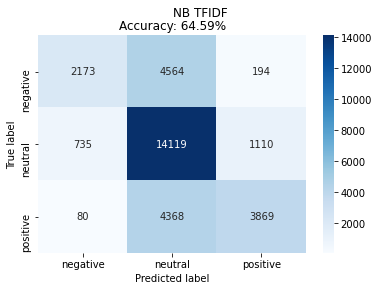

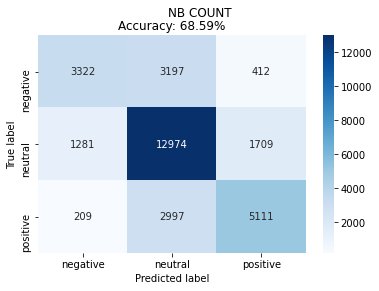

In [171]:
plot_without_strength(predictions_nb_tfidf, "NB TFIDF")
plot_without_strength(predictions_nb_count, "NB COUNT")

### Support Vector Machine

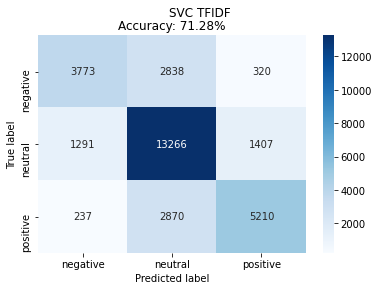

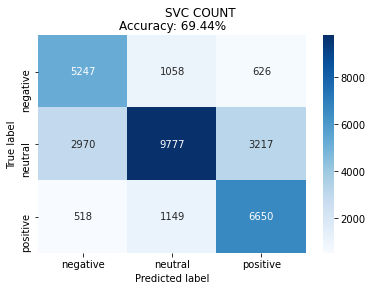

In [172]:
plot_without_strength(predictions_svc_tfidf, "SVC TFIDF")
plot_without_strength(predictions_svc_count, "SVC COUNT")